In [209]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
base_path = '/Users/freezylex/Documents/course_work'

In [210]:
folder_path = 'Metrics and target OLD/All metrics in one folder'
metrics_path = os.path.join(base_path, folder_path)
files = pd.Series(os.listdir(metrics_path))
files

0            price_dispersion.xlsx
1             till_redemption.xlsx
2               trading_share.xlsx
3                         urc.xlsx
4                trades_count.xlsx
5             trading_volumne.xlsx
6    priced_minus_market_data.xlsx
7              bid_ask_spread.xlsx
8                          ms.xlsx
dtype: object

In [211]:
price_disp = pd.read_excel(os.path.join(base_path, metrics_path, 
                                        files[files.str.contains('dispersion')].values[0]), 
                           index_col = 'Date', parse_dates = True)

till_red = pd.read_excel(os.path.join(base_path, metrics_path, 
                                      files[files.str.contains('redemption')].values[0]), 
                         index_col = 'Date', parse_dates = True)

trad_share = pd.read_excel(os.path.join(base_path, metrics_path, 
                                        files[files.str.contains('trading_share')].values[0]), 
                           index_col = 'Date', parse_dates = True)

urc = pd.read_excel(os.path.join(base_path, metrics_path, 
                                 files[files.str.contains('urc')].values[0]), 
                    index_col = 'Date', parse_dates = True)

trad_count = pd.read_excel(os.path.join(base_path, metrics_path, 
                                        files[files.str.contains('count')].values[0]), 
                           index_col = 'Date', parse_dates = True)

trad_vol = pd.read_excel(os.path.join(base_path, metrics_path, 
                                      files[files.str.contains('trading_volumne')].values[0]), #change to trading_volume
                         index_col = 'Date', parse_dates = True)

bid_ask = pd.read_excel(os.path.join(base_path, metrics_path, 
                                     files[files.str.contains('bid_ask')].values[0]), 
                        index_col = 'Date', parse_dates = True)

ms = pd.read_excel(os.path.join(base_path, metrics_path, 
                                files[files.str.contains('ms')].values[0]),  #change to market share
                    index_col = 'Date', parse_dates = True)

rvi = pd.read_csv(os.path.join(base_path, 'data/metrics/rvi.csv'), #Change so that it was in line with all
                  index_col = 'Date', parse_dates = True)

max_hhi = pd.read_csv(os.path.join(base_path, 'data/metrics/max_hhi.csv'), #Change so that it was in line with all
                  index_col = 'Date', parse_dates = True) 

cds = pd.read_excel(os.path.join(base_path, 'data/metrics/cds_1y.xlsx'), #Change so that it was in line with all
                  index_col = 'Date', parse_dates = True) 

In [212]:
max_hhi = max_hhi.loc['2015-06-01':]

# Graphs

In [213]:
rates = pd.read_excel(base_path + '/data/final_target.xlsx',
                      index_col = 'Date', parse_dates=True)
rates = rates.loc['2015-06-01':]
rates.head(2)

,SU26214RMFS,SU26215RMFS,SU26216RMFS,SU26217RMFS,SU26218RMFS,SU26203RMFS,SU26204RMFS,SU26205RMFS,SU26206RMFS,SU26207RMFS,SU26208RMFS,SU26209RMFS,SU26210RMFS,SU26211RMFS,SU26212RMFS
Date,,,,,,,,,,,,,,,
2015-06-01,-75.542312,-70.534808,-86.124816,-71.481012,-100.012391,-228.008510,-117.905118,-72.192157,-157.099153,-78.731685,-89.892618,-70.436857,-78.940122,-70.306738,-82.333042
2015-06-02,-79.848597,-74.947765,-89.607083,-76.468441,-102.414737,-229.443186,-121.493108,-77.074779,-160.876097,-81.616755,-93.282563,-75.359672,-82.846247,-75.021446,-85.079874


In [214]:
available_indexes = list((set(max_hhi.index) & set(bid_ask.index) & set(rates.index)))
available_indexes = np.sort(np.array(available_indexes))

rates = rates.loc[available_indexes]
price_disp = price_disp.loc[available_indexes]
till_red = till_red.loc[available_indexes]
trad_share = trad_share.loc[available_indexes]
urc = urc.loc[available_indexes]
trad_count = trad_count.loc[available_indexes]
trad_vol = trad_vol.loc[available_indexes]
bid_ask = bid_ask.loc[available_indexes]
ms = ms.loc[available_indexes]
max_hhi = max_hhi.loc[available_indexes]

### Price dispertion

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


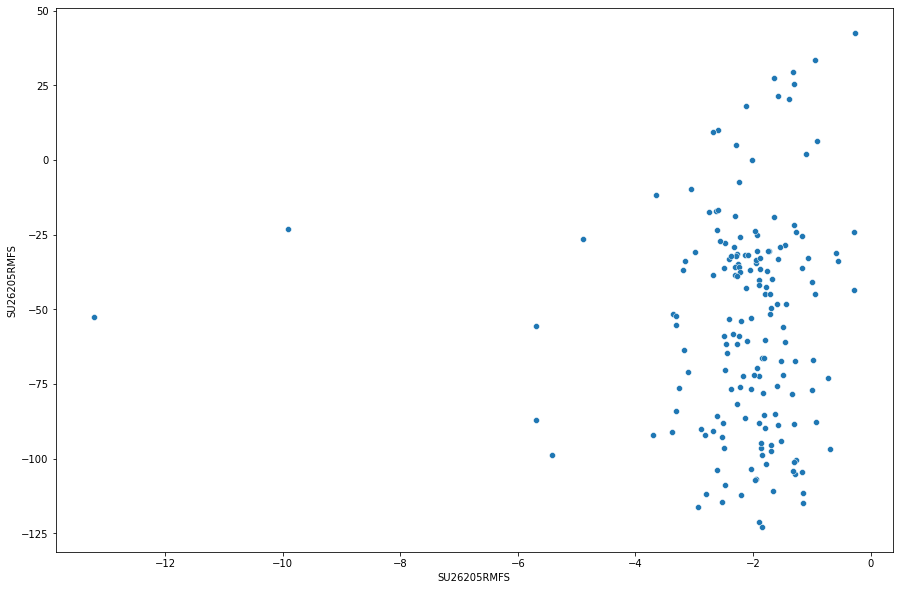

In [7]:
bond = 'SU26205RMFS'

fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x = np.log(price_disp[bond]), y = rates[bond])
plt.show()

#### Conclusions:

26214, 26215, 26205, 26206, 26208, 26209, 26210, 26211:
- log makes fine except outliers, where initial value ~ 0

26216:
- better without log, except big outliers 

26203:
- inverse is good except outliers, where initial value ~ 0

26204:
- log is good but it shows no connection between variable and target

26207, 26212:
- inverse or log

How to fill days with 0? It is not traded -> maybe max value + some constant?

### Trading Share

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


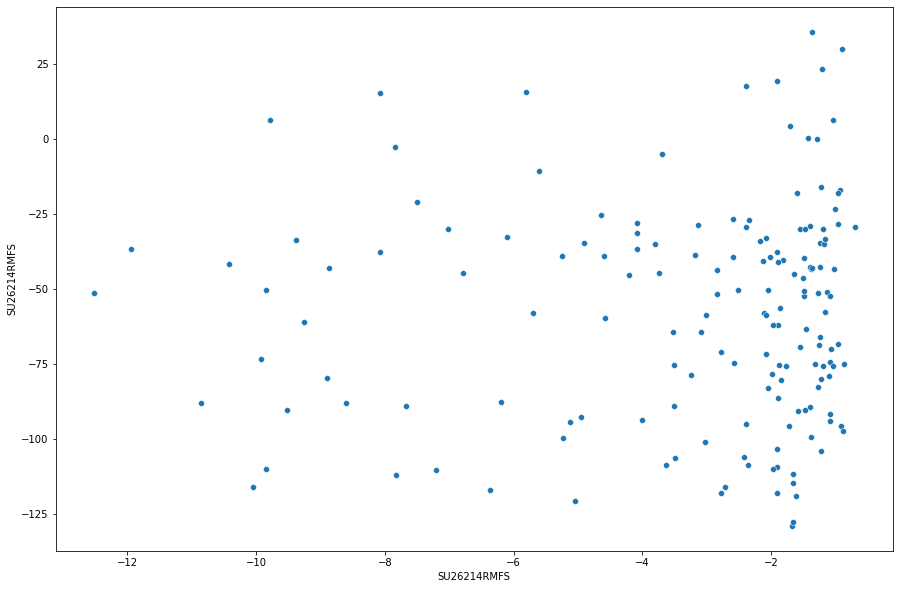

In [103]:
bond = 'SU26214RMFS'

fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x = np.log(trad_share[bond]), y = rates[bond])
plt.show()

### Conclusions:

26214, 26206, 26209, 26210, 26211:
 - doesn't work
 
26203, 26204, 26208:
 - log is useful but no significant imporevemnt
 
26215, 26203, 26207, 26212:
 - log might work, except outliers where initial value ~ 0

26216:
 - both log and sqrt show as if there was some break
 

### URC

### Conclusions

Logic of construction of this variable needs to be checked again

### Trade count

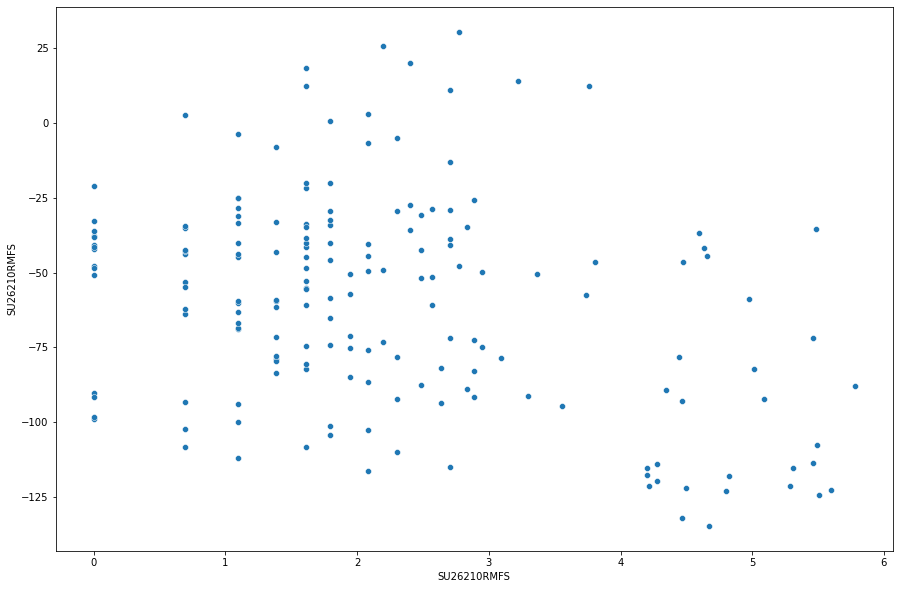

In [227]:
bond = 'SU26210RMFS'

fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x = np.log(trad_count[bond]), y = rates[bond])
plt.show()

### Conclusions

26214, 26216, 26203, 26210, 26212:
 - log or sqrt, needs to be checked (Box-Cox test preferrably) + heteroskedasticity?
 
26215, 26209:
 - sqrt makes it better but not perfect
 
26204, 26206, 26207:
 - sqrt makes it better but not perfect
 
26205, 26208, 26211:
 - with log heteroskedasticity?
 



### Trading volume

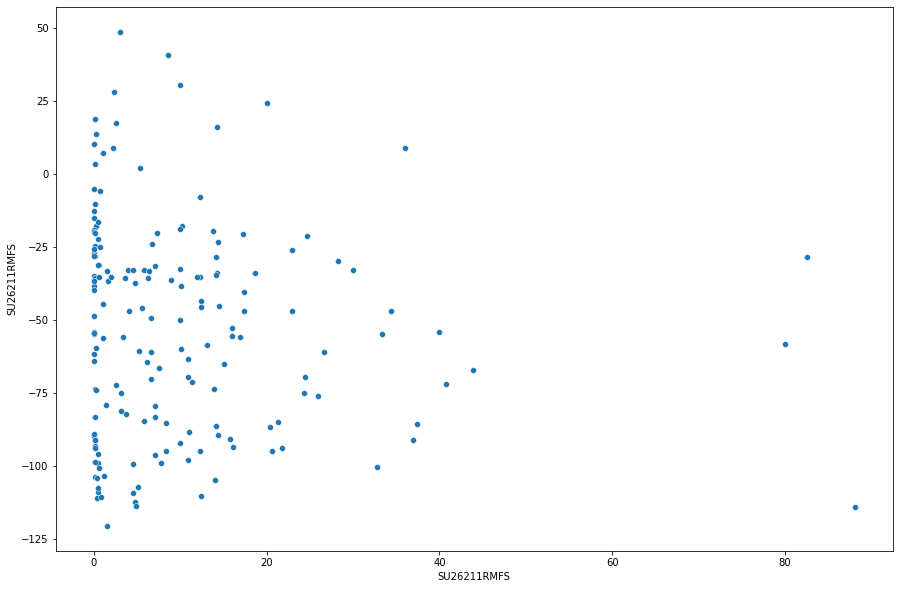

In [200]:
bond = 'SU26211RMFS'

fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x = np.sqrt(trad_vol[bond]/1000), y = rates[bond])
plt.show()

### Conclusions:

26212, 26214, 26204, 26207, 26208, 26209, 26210, 26211:
 - no effect

26215, 26216, 26203:
 - maybe sqrt

26205, 26206:
 - log makes sense but some outliers

### Bid Ask spread (basic)

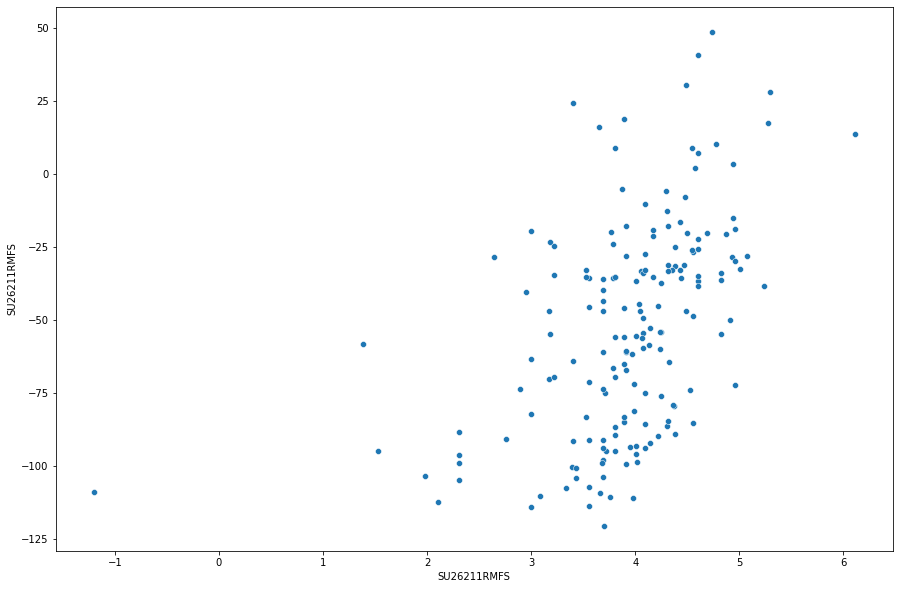

In [228]:
bond = 'SU26211RMFS'

fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x = np.log(bid_ask[bond]), y = rates[bond])
plt.show()

### Conclusions:

26214, 26215, 26216:
 - sqrt or log makes perfect, Box-Cox test

26203, 26204, 26205, 26206, 26212:
 - log makes perfect, but seems that connection is low

26207, 26209, 26210, 26211:
 - log makes perfect
 
26208:
 - qrt or log, not much better

## Market Share

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


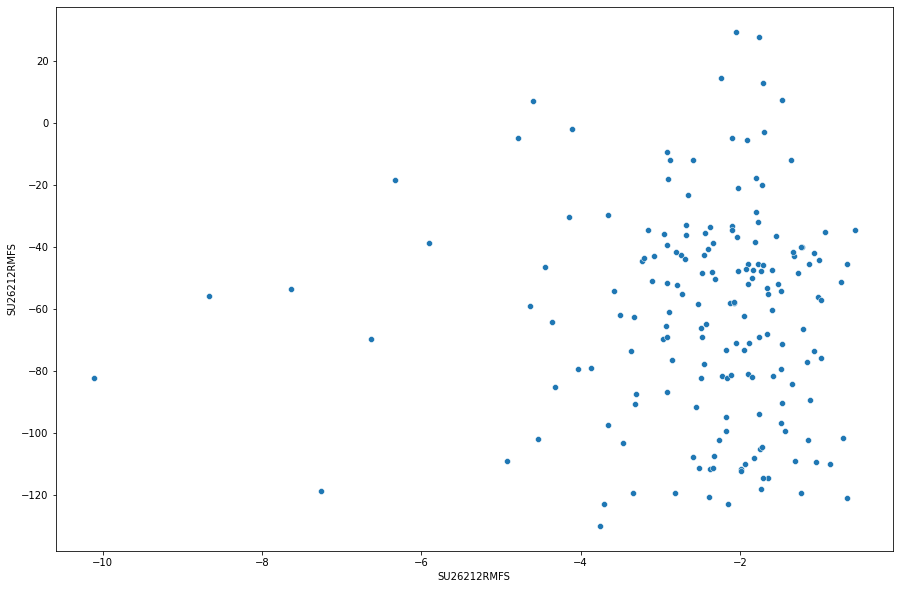

In [260]:
bond = 'SU26212RMFS'

fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x = np.log(ms[bond]), y = rates[bond])
plt.show()

### Conclusions

26214, 26204, 26208, 26209, 26210, 26211:
 - makes no sense
 
26215:
 - log shows some concentration, but outliers
 
26216:
 - as if some break in data (split in half) with log
 
26203, 26205, 26206, 26207, 26212:
 - log helps a little, but so-so

# For graph - comparison of dynamics

In [5]:
def make_scaled_fatures_for_bond(bond, scaling = True):
    '''
    List of dfs and names needs to be updated in case of additional metrics
    
    Needs addition: max_hhi
    '''
    dfs = [price_disp, trad_share, urc, trad_count, trad_vol, bid_ask, ms]
    names = ['Price_disp', 'trad_share', 'URC','trad_count', 'trad_vol', 'bid_ask', 'market_share']
    index_ = price_disp.index
    info_df = pd.DataFrame(index = index_,
                           columns = names)
    for i in range(len(dfs)):
        table = dfs[i][bond].values.reshape((-1, 1))
        if scaling:
            scaler = StandardScaler()
            vector = scaler.fit_transform(table)
        else:
            vector = table
        info_df[names[i]] = vector
    return info_df

In [23]:
def make_plot_of_features(bond, list_of_features, if_scale):
    bond_featutes = make_scaled_fatures_for_bond(bond, scaling = if_scale)
    bond_featutes = bond_featutes[list_of_features]
    #bond_featutes['bid_ask'] /= 100
    #bond_featutes['bid_ask'] = np.log(bond_featutes['bid_ask'])
    #bond_featutes['trad_count'] = np.log(bond_featutes['trad_count'])
    fig, ax = plt.subplots(figsize=(15, 10))
    sns.lineplot(data = bond_featutes)
    plt.show()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


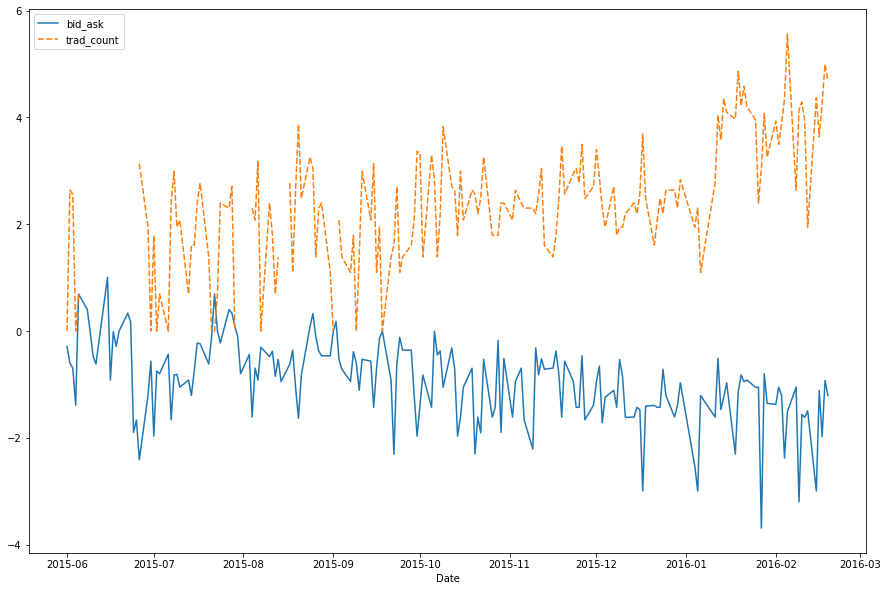

In [24]:
make_plot_of_features('SU26214RMFS', ['bid_ask', 'trad_count'], if_scale=False)

### Заметки:

- на многих облигах в начале 2016 (как раз тогда, как произошел структурный разрыв) наблюдается увеличение количества сделок. надо точно исследовать по time to maturity на каких и выявить, для каких это характерно
- возможно, разрыв всё же действительно есть, и он характерен не только для RVI и CDS
- нужно ли брать разности и для этого ряда?..
- может, на бирже что-то случилось? Надо узнать

--------------------------------------------------------------------------------------------------------------
- логарифм BA - линейный тренд
- переход на T+
- какие именно это данные

## Fill of 0 values

Based on the analysis above, we will consider the following variables:

- price dispertion
- trading count
- bid ask spread

In [7]:
(price_disp == 0).sum()

SU26214RMFS    24
SU26215RMFS     1
SU26216RMFS    25
SU26203RMFS     1
SU26204RMFS     0
SU26205RMFS     6
SU26206RMFS     0
SU26207RMFS     0
SU26208RMFS     6
SU26209RMFS    24
SU26210RMFS    35
SU26211RMFS    32
SU26212RMFS     1
dtype: int64

In [8]:
val = price_disp.max().max()
val

1.845271476522003

In [9]:
price_disp.values.ravel().mean(), price_disp.values.ravel().std() 
#или 95/99-ый квантиль

(0.14937428743953737, 0.14106148525611556)

In [10]:
val += 0.45

In [11]:
price_disp[price_disp == 0] = val

#### Possible outliers (days) for bonds

204: 2015-12-10

205: 2015-06-05, 2015-09-16

206: 2015-06-02

207(?): 2015-09-17 , 2015-06-01 

208: 2015-07-02, 2015-10-12, 2015-08-12, 2015-06-17, 2015-06-30

209: 2015-06-17

210: 2015-09-15, 2015-09-18

211: 2015-10-19, 2015-09-15, 2015-09-07, 2015-09-04, 2015-09-09, 2015-09-03, 2015-06-23, 2015-09-10, 2015-06-26, 2015-07-03

214: 2015-07-03, 2016-02-12

215: 2015-07-13

In [124]:
outliers = {'204': ['2015-12-10'],
            '205': ['2015-06-05', '2015-09-16'], 
            '206': ['2015-06-02'], 
            '207': ['2015-09-17', '2015-06-01'], 
            '208': ['2015-07-02', '2015-10-12', '2015-08-12', '2015-06-17', '2015-06-30'],
            '209': ['2015-06-17'],
            '210': ['2015-09-15', '2015-09-18'],
            '211': ['2015-10-19', '2015-09-15', '2015-09-07', '2015-09-04', '2015-09-09', '2015-09-03', '2015-06-23', '2015-09-10', '2015-06-26', '2015-07-03'],
            '214': ['2015-07-03', '2016-02-12'],
            '215': ['2015-07-13']
           }

In [125]:
all_dates = []
for key, val in outliers.items():
    outliers[key] = np.sort(val)
    all_dates += val
all_dates = np.sort(all_dates)
np.unique(all_dates)

array(['2015-06-01', '2015-06-02', '2015-06-05', '2015-06-17',
       '2015-06-23', '2015-06-26', '2015-06-30', '2015-07-02',
       '2015-07-03', '2015-07-13', '2015-08-12', '2015-09-03',
       '2015-09-04', '2015-09-07', '2015-09-09', '2015-09-10',
       '2015-09-15', '2015-09-16', '2015-09-17', '2015-09-18',
       '2015-10-12', '2015-10-19', '2015-12-10', '2016-02-12'],
      dtype='<U10')

### Trading count

- ln(1+)

In [64]:
trad_count[trad_count == 0] = 0.01 

In [175]:
'''
outliers_tc = { '205': ['2015-06-09', '2015-07-03'],
                '208': ['2015-06-19'], 
                '209': ['2016-01-04', '2015-07-08', '2015-07-06', '2015-07-03', '2015-06-25', '2015-06-23', '2015-09-09'],
                '210': ['2015-10-12', '2015-10-09', '2015-07-08', '2015-07-06',
               '2015-07-02', '2015-07-30', '2015-06-29', '2015-06-26',
               '2015-07-31', '2015-06-24', '2015-10-26', '2015-08-17',
               '2015-08-07', '2015-06-10', '2015-08-12'],
                '211': ['2015-10-12', '2015-06-25', '2015-06-24', '2015-07-30',
               '2015-08-06', '2015-10-02', '2015-10-01', '2015-08-14',
               '2015-09-18', '2015-06-08', '2015-09-17', '2015-09-08',
               '2015-09-14', '2015-09-23'],
                '212': ['2015-06-24'],
                '214': ['2015-09-02', '2015-06-25', '2015-06-23', '2015-06-22',
               '2015-06-19', '2015-07-30', '2015-06-17', '2015-08-03',
               '2015-06-15', '2015-06-10', '2015-06-09', '2015-06-08',
               '2015-08-14'],
               '216':['2015-06-22', '2015-07-08', '2015-06-04', '2015-06-05',
               '2015-06-08', '2015-06-09', '2015-08-28', '2015-08-03',
               '2015-08-07', '2015-08-10', '2015-08-11', '2015-06-25',
               '2015-06-24']
               }
'''
outliers_tc = {'203': ['2016-02-15'],
               '206': ['2015-12-25', '2016-01-26', '2015-06-26'], 
               '209': ['2016-01-19', '2016-01-21', '2016-01-20', '2016-01-22'],
               '211': ['2016-01-19'], 
               '214': ['2016-02-05']}

In [176]:
all_dates_tc = []
for key, val in outliers_tc.items():
    outliers_tc[key] = np.sort(val)
    all_dates_tc += val
all_dates_tc = np.sort(all_dates_tc)
np.unique(all_dates_tc)

array(['2015-06-26', '2015-12-25', '2016-01-19', '2016-01-20',
       '2016-01-21', '2016-01-22', '2016-01-26', '2016-02-05',
       '2016-02-15'], dtype='<U10')

### Bid ask spread

- no outliers

### Dates outliers

In [207]:
set(all_dates_tc) & set(all_dates)

{'2015-06-26'}

In [208]:
set(all_dates_tc) | set(all_dates)

{'2015-06-01',
 '2015-06-02',
 '2015-06-05',
 '2015-06-17',
 '2015-06-23',
 '2015-06-26',
 '2015-06-30',
 '2015-07-02',
 '2015-07-03',
 '2015-07-13',
 '2015-08-12',
 '2015-09-03',
 '2015-09-04',
 '2015-09-07',
 '2015-09-09',
 '2015-09-10',
 '2015-09-15',
 '2015-09-16',
 '2015-09-17',
 '2015-09-18',
 '2015-10-12',
 '2015-10-19',
 '2015-12-10',
 '2015-12-25',
 '2016-01-19',
 '2016-01-20',
 '2016-01-21',
 '2016-01-22',
 '2016-01-26',
 '2016-02-05',
 '2016-02-12',
 '2016-02-15'}